Epoch 1/10
10/10 [==============================] - 1s 39ms/step - loss: 3.3373 - accuracy: 0.3428 - val_loss: 2.6666 - val_accuracy: 0.4721
Epoch 2/10
10/10 [==============================] - 0s 13ms/step - loss: 2.5311 - accuracy: 0.5433 - val_loss: 2.2944 - val_accuracy: 0.6662
Epoch 3/10
10/10 [==============================] - 0s 15ms/step - loss: 2.2185 - accuracy: 0.7142 - val_loss: 2.0893 - val_accuracy: 0.7673
Epoch 4/10
10/10 [==============================] - 0s 13ms/step - loss: 2.0290 - accuracy: 0.8134 - val_loss: 1.9526 - val_accuracy: 0.8357
Epoch 5/10
10/10 [==============================] - 0s 14ms/step - loss: 1.8972 - accuracy: 0.8605 - val_loss: 1.8412 - val_accuracy: 0.8536
Epoch 6/10
10/10 [==============================] - 0s 13ms/step - loss: 1.7850 - accuracy: 0.8709 - val_loss: 1.7402 - val_accuracy: 0.8618
Epoch 7/10
10/10 [==============================] - 0s 13ms/step - loss: 1.6860 - accuracy: 0.8835 - val_loss: 1.6442 - val_accuracy: 0.8786
Epoch 8/10
10

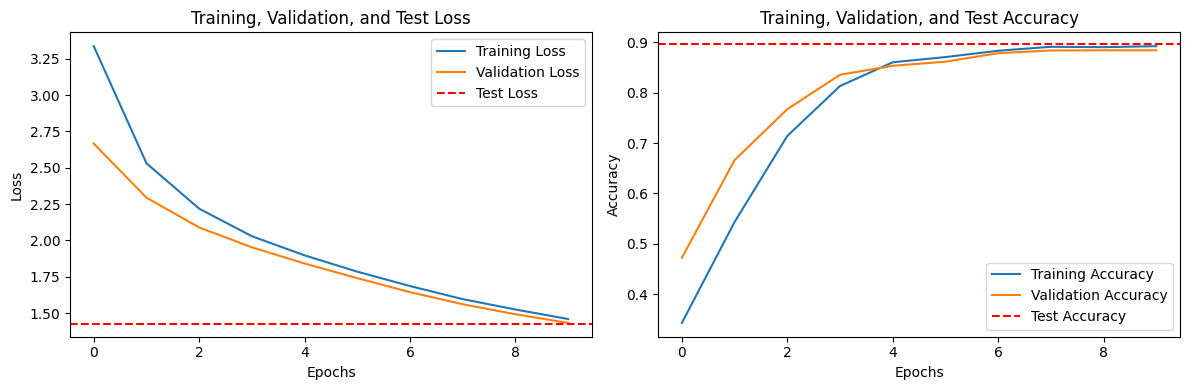

In [12]:
import numpy as np ## LIBRARY DEVELOPMENT
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Loading preprocessed training data
train_data = pd.read_excel('train_data.xlsx')

# Load  preprocessed validation data
val_data = pd.read_excel('val_data.xlsx')

# Load your preprocessed test data (replace 'test_data.xlsx' with your file name)
test_data = pd.read_excel('test_data.xlsx')

# Extract features and labels for training
X_train = train_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].values
y_train = train_data['Class'].values

# Extract features and labels for validation
X_val = val_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].values
y_val = val_data['Class'].values

# Extract features and labels for testing
X_test = test_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].values
y_test = test_data['Class'].values

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(6,)),  # Input layer with 6 features
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model with your training data
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=1000, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Load  preprocessed training data (replace 'train_data.xlsx' with your file name)
train_data = pd.read_excel('train_data.xlsx')

# Extract features (AccX, AccY, AccZ, GyroX, GyroY, GyroZ) and labels (Class)
X_train = train_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].values
y_train = train_data['Class'].values

# Encode class labels to numerical values using LabelEncoder Documentation provided (stack overflow)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Load preprocessed validation data (replace 'val_data.xlsx' with your file name)
val_data = pd.read_excel('val_data.xlsx')

# Extract features and labels for validation
X_val = val_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].values
y_val = val_data['Class'].values
y_val = label_encoder.transform(y_val)  # Encode  class labels : 1 supine, 2 side, 3 down, etc.

# Load preprocessed test data replacing csv with xlsx
test_data = pd.read_excel('test_data.xlsx')

# Extract features and labels for testing development
X_test = test_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].values
y_test = test_data['Class'].values
y_test = label_encoder.transform(y_test)  # Encode  class labels

# dense neural network with Sigmoid activation
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(6,)),  # one array for the input data
    tf.keras.layers.Dense(64, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='softmax')  # Output layer with softmax activation: Provided by references
])

# Compile the model
model_sigmoid.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss_sigmoid, test_accuracy_sigmoid = model_sigmoid.evaluate(X_test, y_test)
print("Sigmoid Activation:")
print(f"Test Loss: {test_loss_sigmoid:.4f}, Test Accuracy: {test_accuracy_sigmoid:.4f}")

# Repeat the above steps for Tanh activation
model_tanh = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(6,)),  # Flatten the input data
    tf.keras.layers.Dense(64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='softmax')  # Output layer with softmax activation
])

model_tanh.compile(optimizer='adam', # weight manipulation for the counterbalancing of overfitting
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_tanh = model_tanh.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss_tanh, test_accuracy_tanh = model_tanh.evaluate(X_test, y_test)
print("\nTanh Activation:")
print(f"Test Loss: {test_loss_tanh:.4f}, Test Accuracy: {test_accuracy_tanh:.4f}")

# Repeat the above steps for ReLU activation
model_relu = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(6,)),  # Flatten the input data
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='softmax')  # Output layer with softmax activation
])

model_relu.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_relu = model_relu.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss_relu, test_accuracy_relu = model_relu.evaluate(X_test, y_test)
print("\nReLU Activation:")
print(f"Test Loss: {test_loss_relu:.4f}, Test Accuracy: {test_accuracy_relu:.4f}")


Epoch 1/10
303/303 [==============================] - 2s 3ms/step - loss: 1.6359 - accuracy: 0.3656 - val_loss: 1.3801 - val_accuracy: 0.3752
Epoch 2/10
303/303 [==============================] - 1s 2ms/step - loss: 1.3617 - accuracy: 0.3664 - val_loss: 1.3558 - val_accuracy: 0.3671
Epoch 3/10
303/303 [==============================] - 1s 3ms/step - loss: 1.3471 - accuracy: 0.3665 - val_loss: 1.3382 - val_accuracy: 0.3671
Epoch 4/10
303/303 [==============================] - 1s 3ms/step - loss: 1.3068 - accuracy: 0.4345 - val_loss: 1.2668 - val_accuracy: 0.6912
Epoch 5/10
303/303 [==============================] - 1s 3ms/step - loss: 1.2067 - accuracy: 0.6752 - val_loss: 1.1514 - val_accuracy: 0.7168
Epoch 6/10
303/303 [==============================] - 1s 3ms/step - loss: 1.1122 - accuracy: 0.7584 - val_loss: 1.0676 - val_accuracy: 0.8367
Epoch 7/10
303/303 [==============================] - 1s 3ms/step - loss: 1.0392 - accuracy: 0.7749 - val_loss: 1.0088 - val_accuracy: 0.8025
Epoch 

Epoch 1/10
303/303 [==============================] - 2s 3ms/step - loss: 1.6835 - accuracy: 0.3579 - val_loss: 1.3887 - val_accuracy: 0.3671
Epoch 2/10
303/303 [==============================] - 1s 2ms/step - loss: 1.3670 - accuracy: 0.3668 - val_loss: 1.3613 - val_accuracy: 0.3675
Epoch 3/10
303/303 [==============================] - 1s 3ms/step - loss: 1.3566 - accuracy: 0.3679 - val_loss: 1.3506 - val_accuracy: 0.3671
Epoch 4/10
303/303 [==============================] - 1s 3ms/step - loss: 1.3545 - accuracy: 0.3661 - val_loss: 1.3568 - val_accuracy: 0.3776
Epoch 5/10
303/303 [==============================] - 1s 2ms/step - loss: 1.3492 - accuracy: 0.3689 - val_loss: 1.3427 - val_accuracy: 0.3680
Epoch 6/10
303/303 [==============================] - 1s 3ms/step - loss: 1.3341 - accuracy: 0.3809 - val_loss: 1.3198 - val_accuracy: 0.5645
Epoch 7/10
303/303 [==============================] - 1s 2ms/step - loss: 1.2591 - accuracy: 0.5996 - val_loss: 1.2056 - val_accuracy: 0.6936
Epoch 

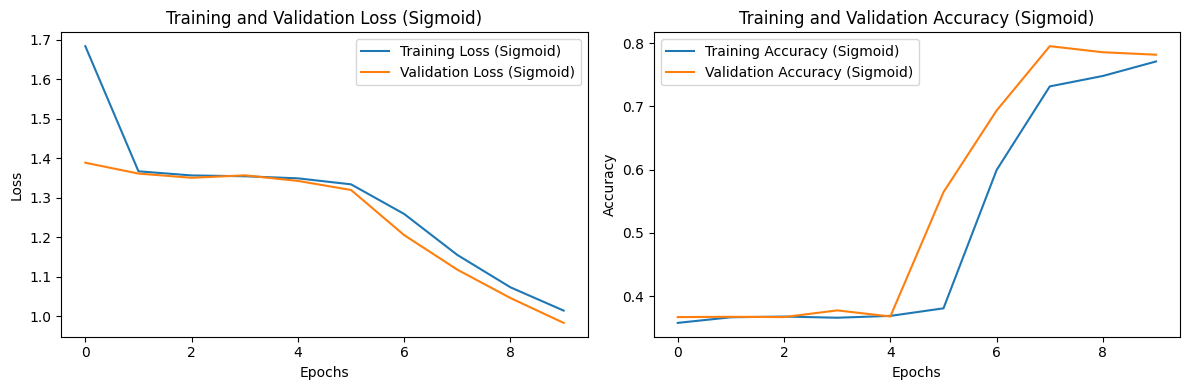

Epoch 1/10
303/303 [==============================] - 2s 4ms/step - loss: 1.3195 - accuracy: 0.8029 - val_loss: 0.6021 - val_accuracy: 0.9851
Epoch 2/10
303/303 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.9889 - val_loss: 0.2992 - val_accuracy: 0.9913
Epoch 3/10
303/303 [==============================] - 1s 4ms/step - loss: 0.2508 - accuracy: 0.9898 - val_loss: 0.2150 - val_accuracy: 0.9908
Epoch 4/10
303/303 [==============================] - 1s 2ms/step - loss: 0.1917 - accuracy: 0.9923 - val_loss: 0.1800 - val_accuracy: 0.9913
Epoch 5/10
303/303 [==============================] - 1s 3ms/step - loss: 0.1691 - accuracy: 0.9914 - val_loss: 0.1557 - val_accuracy: 0.9928
Epoch 6/10
303/303 [==============================] - 1s 2ms/step - loss: 0.1684 - accuracy: 0.9869 - val_loss: 0.1499 - val_accuracy: 0.9933
Epoch 7/10
303/303 [==============================] - 1s 2ms/step - loss: 0.1411 - accuracy: 0.9923 - val_loss: 0.1303 - val_accuracy: 0.9942
Epoch 

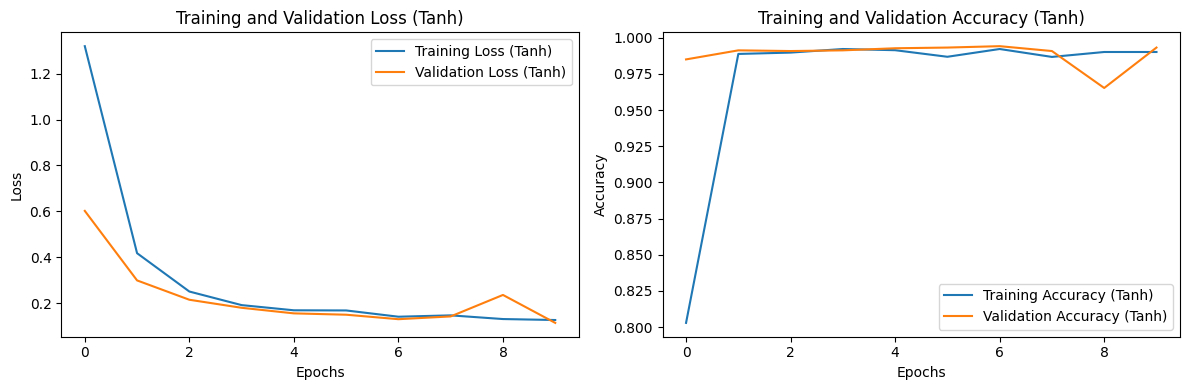

Epoch 1/10
303/303 [==============================] - 2s 3ms/step - loss: 1.6708 - accuracy: 0.7211 - val_loss: 1.1092 - val_accuracy: 0.9003
Epoch 2/10
303/303 [==============================] - 1s 2ms/step - loss: 0.9167 - accuracy: 0.9311 - val_loss: 0.7334 - val_accuracy: 0.9697
Epoch 3/10
303/303 [==============================] - 1s 3ms/step - loss: 0.6954 - accuracy: 0.9613 - val_loss: 0.6013 - val_accuracy: 0.9701
Epoch 4/10
303/303 [==============================] - 1s 2ms/step - loss: 0.5747 - accuracy: 0.9718 - val_loss: 0.4808 - val_accuracy: 0.9855
Epoch 5/10
303/303 [==============================] - 1s 3ms/step - loss: 0.4720 - accuracy: 0.9793 - val_loss: 0.4600 - val_accuracy: 0.9706
Epoch 6/10
303/303 [==============================] - 1s 4ms/step - loss: 0.4011 - accuracy: 0.9827 - val_loss: 0.3572 - val_accuracy: 0.9884
Epoch 7/10
303/303 [==============================] - 1s 3ms/step - loss: 0.3712 - accuracy: 0.9801 - val_loss: 0.3209 - val_accuracy: 0.9880
Epoch 

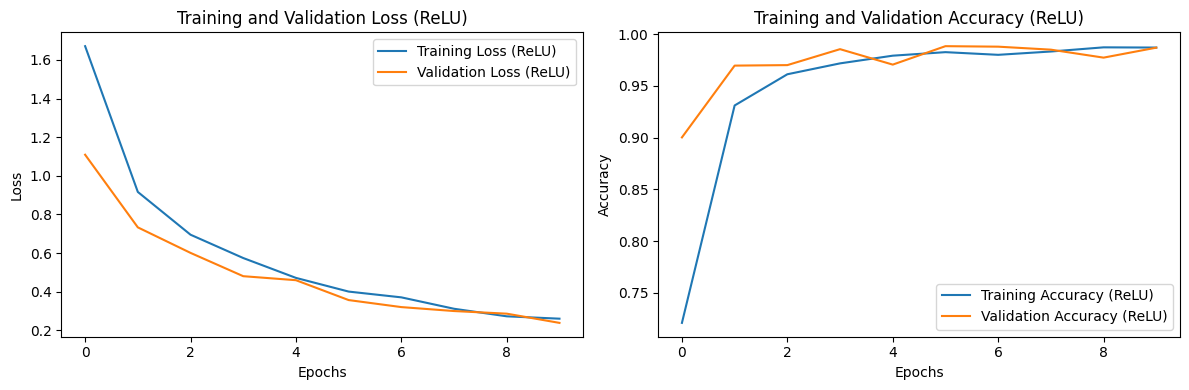